In [1]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

m = ConcreteModel()

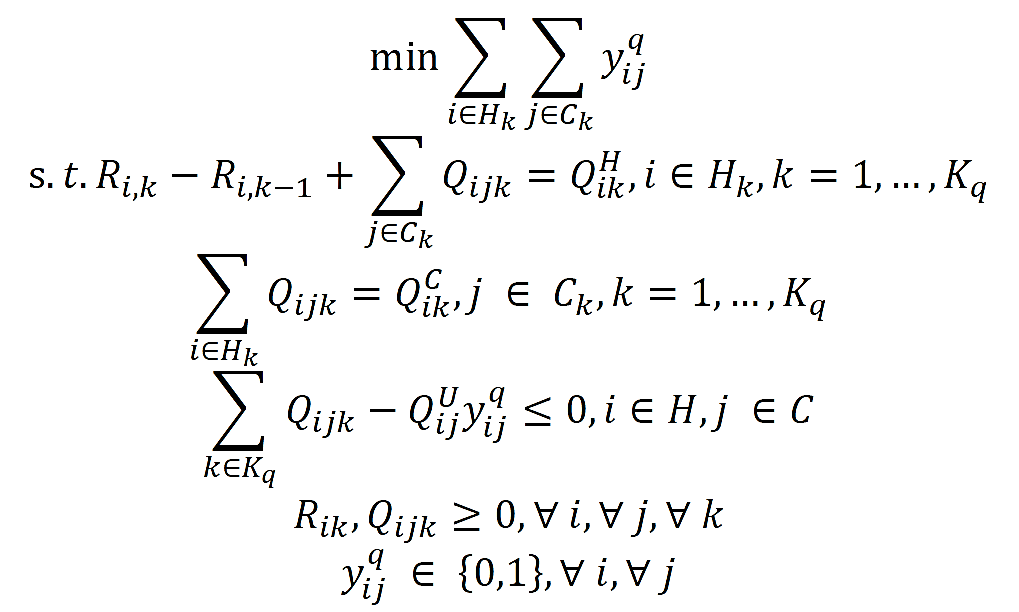

# MILP above Pinch

In [2]:
# Define binary variables
binary_vars = ['y11', 'y12', 'y21', 'y22', 'y31', 'y32', 'yF1', 'yF2', 'yHP1', 'yHP2', 'yLP1', 'yLP2']
for var in binary_vars:
    m.add_component(var, Var(domain=Binary))

# Define non-negative real variables
non_negative_vars = [
    'R11', 'R12', 'R13', 'R14', 'R25', 'R26', 'R22', 'R23', 'R24', 'R34', 'R35', 'R36',
    'RF1', 'RF2', 'RF3', 'RF4', 'RF5', 'RF6', 'RHP3', 'RHP4', 'RHP5', 'RHP6', 'RLP5', 'RLP6',
    'Q111', 'Q112', 'Q113', 'Q114', 'Q212', 'Q213', 'Q124', 'Q214', 'Q224', 'Q314', 'Q324',
    'Q215', 'Q225', 'Q315', 'Q325', 'Q226', 'Q326', 'QF11', 'QF12', 'QF13', 'QF14', 'QF24',
    'QF15', 'QF25', 'QF26', 'QHP13', 'QHP14', 'QHP24', 'QHP15', 'QHP25', 'QHP26', 'QLP15', 'QLP25', 'QLP26'
]
for var in non_negative_vars:
    m.add_component(var, Var(domain=NonNegativeReals))

In [3]:
# Define Constraints 
m.cond1 = Constraint(expr = m.RF1 + (m.QF11)== 2100)
m.cond2 = Constraint(expr = m.R11 + (m.Q111)== 2000)
m.cond3 = Constraint(expr = m.R12-m.R11+ (m.Q112)== 1800)
m.cond4 = Constraint(expr = m.R22 + (m.Q212)== 3600)
m.cond5 = Constraint(expr = m.RF2 - m.RF1 + (m.QF12)== 0)
m.cond6 = Constraint(expr = m.R13 - m.R12 + (m.Q113)== 1000)
m.cond7 = Constraint(expr = m.R23 - m.R22 + (m.Q213)== 2000)
m.cond8 = Constraint(expr = m.RHP3 + m.QHP13 == 1000)
m.cond9 = Constraint(expr = m.RF3 - m.RF2 + m.QF13 == 0)
m.cond10 = Constraint(expr = m.R14 - m.R13 + (m.Q114) + m.Q124 == 800)
m.cond11 = Constraint(expr = m.R24 - m.R23 + m.Q214 + (m.Q224)== 2000)
m.cond12 = Constraint(expr = m.R34 + (m.Q314) + m.Q324 == 3500)
m.cond13 = Constraint(expr = m.RF4 - m.RF3 + m.QF14 + (m.QF24)== 0)
m.cond14 = Constraint(expr = m.RHP4 - m.RHP3 + m.QHP14 + (m.QHP24)== 0)
m.cond15 = Constraint(expr = m.R25 - m.R24 + m.Q215 + (m.Q225)== 1600)
m.cond16 = Constraint(expr = m.R35 - m.R34 + m.Q315 + (m.Q325)== 2800)
m.cond18 = Constraint(expr = m.RLP5 + m.QLP15 + m.QLP25 == 500)
m.cond19 = Constraint(expr = m.RF5 - m.RF4 + m.QF15 + m.QF25 == 0)
m.cond20 = Constraint(expr = m.RHP5 - m.RHP4 + m.QHP15 + m.QHP25 == 0)
m.cond21 = Constraint(expr = m.R26 - m.R25 + (m.Q226)== 400)
m.cond22 = Constraint(expr = m.R36 - m.R35 + (m.Q326)== 700)
m.cond23 = Constraint(expr = m.RLP6 - m.RLP5 + m.QLP26 == 0)
m.cond24 = Constraint(expr = m.RF6 - m.RF5 + m.QF26 == 0)
m.cond25 = Constraint(expr = m.RHP6 - m.RHP5 + m.QHP26 == 0)
m.cond26 = Constraint(expr = m.QF11 + m.Q111 == 3500)
m.cond27 = Constraint(expr = m.Q112 + m.Q212 + m.QF12 == 4500)
m.cond28 = Constraint(expr = m.Q113 + m.Q213 + m.QHP13 + m.QF13 == 2500)
m.cond29 = Constraint(expr = m.Q114 + m.Q214 + m.Q314 + m.QHP14 + m.QF14 == 2500)
m.cond30 = Constraint(expr = m.Q124 + m.Q224 + m.Q324 + m.QHP24 + m.QF24 == 1800)
m.cond31 = Constraint(expr = m.Q215 + m.Q315 + m.QLP15 + m.QHP15 + m.QF15 == 2000)
m.cond32 = Constraint(expr = m.Q225 + m.Q325 + m.QLP25 + m.QHP25 + m.QF25 == 7200)
m.cond33 = Constraint(expr = m.Q226 + m.Q326 + m.QLP26 + m.QHP26 + m.QF26 == 1800)
m.cond34 = Constraint(expr = m.Q111 + m.Q112 + m.Q113 + m.Q114-5600*m.y11 <=0)
m.cond35 = Constraint(expr = m.Q212 + m.Q213 + m.Q214 + m.Q215-9200*m.y21 <=0)
m.cond36 = Constraint(expr = m.Q314 + m.Q315-4500*m.y31 <=0)
m.cond37 = Constraint(expr = m.Q124-0*m.y12 <=0)
m.cond38 = Constraint(expr = m.Q224 + m.Q225 + m.Q226-9600*m.y22 <=0)
m.cond39 = Constraint(expr = m.Q324 + m.Q325 + m.Q326-7000*m.y32 <=0)
m.cond40 = Constraint(expr = m.QF11 + m.QF12 + m.QF13 + m.QF14 + m.QF15-2100*m.yF1 <=0)
m.cond41 = Constraint(expr = m.QF24 + m.QF25 + m.QF26-2100*m.yF2 <=0)
m.cond42 = Constraint(expr = m.QHP13 + m.QHP14 + m.QHP15-1000*m.yHP1 <=0)
m.cond43 = Constraint(expr = m.QHP24 + m.QHP25 + m.QHP26-1000*m.yHP2 <=0)
m.cond44 = Constraint(expr = m.QLP15-500*m.yLP1 <=0)
m.cond45 = Constraint(expr = m.QLP25 + m.QLP26-500*m.yLP2 <=0)

In [4]:
# Define object & solve using gurobi
m.obj = Objective(expr = m.y11+m.y12+m.y21+m.y22+m.y31+m.y32+m.yF1+m.yF2+m.yHP1+m.yHP2+m.yLP1+m.yLP2, sense=minimize)
opt = SolverFactory('gurobi')
opt.solve(m, tee=True)

print("y11:", value(m.y11))
print("y12:", value(m.y12))
print("y21:", value(m.y21))
print("y22:", value(m.y22))
print("y31:", value(m.y31))
print("y32:", value(m.y32))
print("yF1:", value(m.yF1))
print("yF2:", value(m.yF2))
print("yHP1:", value(m.yHP1))
print("yHP2:", value(m.yHP2))
print("yLP1:", value(m.yLP1))
print("yLP2:", value(m.yLP2))

Restricted license - for non-production use only - expires 2025-11-24
Read LP format model from file C:\Users\Dell\AppData\Local\Temp\tmpmhj1w1sz.pyomo.lp
Reading time = 0.01 seconds
x71: 45 rows, 71 columns, 156 nonzeros
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 45 rows, 71 columns and 156 nonzeros
Model fingerprint: 0x70489095
Variable types: 59 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+03]
Found heuristic solution: objective 7.0000000
Presolve removed 17 rows and 26 columns
Presolve time: 0.02s
Presolved: 28 rows, 45 columns, 109 nonzeros
Variable types: 37 continuous, 8 integer (8 binary)

Root relaxation: cutoff, 

# MILP below Pinch

In [ ]:
# Define binary variables
binary_vars = ['y22', 'y32', 'y42', 'y2CW', 'y3CW', 'y4CW']
m.Y = Var(binary_vars, domain=Binary)

# Define non-negative real variables
non_negative_vars = ['R27', 'R37', 'R47', 'R28', 'R38', 'R48',
                      'Q227', 'Q327', 'Q427', 'Q2CW8', 'Q3CW8', 'Q4CW8']

# Add variables to the model
for var in binary_vars + non_negative_vars:
    m.add_component(var, Var(domain=Binary) if var.startswith('y') else Var(domain=NonNegativeReals))

# Define constraints
m.cond1 = Constraint(expr=m.R27 + m.Q227 == 1600)
m.cond2 = Constraint(expr=m.R37 + m.Q327 == 2800)
m.cond3 = Constraint(expr=m.R47 + m.Q427 == 3760)
m.cond4 = Constraint(expr=m.R28 - m.R27 + m.Q2CW8 == 400)
m.cond5 = Constraint(expr=m.R38 - m.R37 + m.Q3CW8 == 700)
m.cond6 = Constraint(expr=m.R48 - m.R47 + m.Q4CW8 == 940)
m.cond7 = Constraint(expr=m.Q227 + m.Q327 + m.Q427 == 7200)
m.cond8 = Constraint(expr=m.Q2CW8 + m.Q3CW8 + m.Q4CW8 == 3000)
m.cond9 = Constraint(expr=m.Q227 - 1600 * m.Y['y22'] <= 0)
m.cond10 = Constraint(expr=m.Q327 - 2800 * m.Y['y32'] <= 0)
m.cond11 = Constraint(expr=m.Q427 - 4500 * m.Y['y42'] <= 0)
m.cond12 = Constraint(expr=m.Q2CW8 - 2000 * m.Y['y2CW'] <= 0)
m.cond13 = Constraint(expr=m.Q2CW8 - 3000 * m.Y['y3CW'] <= 0)
m.cond14 = Constraint(expr=m.Q4CW8 - 3000 * m.Y['y4CW'] <= 0)

# Define the objective function
m.obj = Objective(expr=sum(m.Y[var] for var in binary_vars), sense=minimize)

# Solve the optimization problem
opt = SolverFactory('gurobi')
opt.solve(m, tee=True)

# Display results
for var in binary_vars:
    print(f"{var}: {value(m.Y[var])}")